C:\Users\mailr\Anaconda3\lib\site-packages\ipykernel_launcher.py:170: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


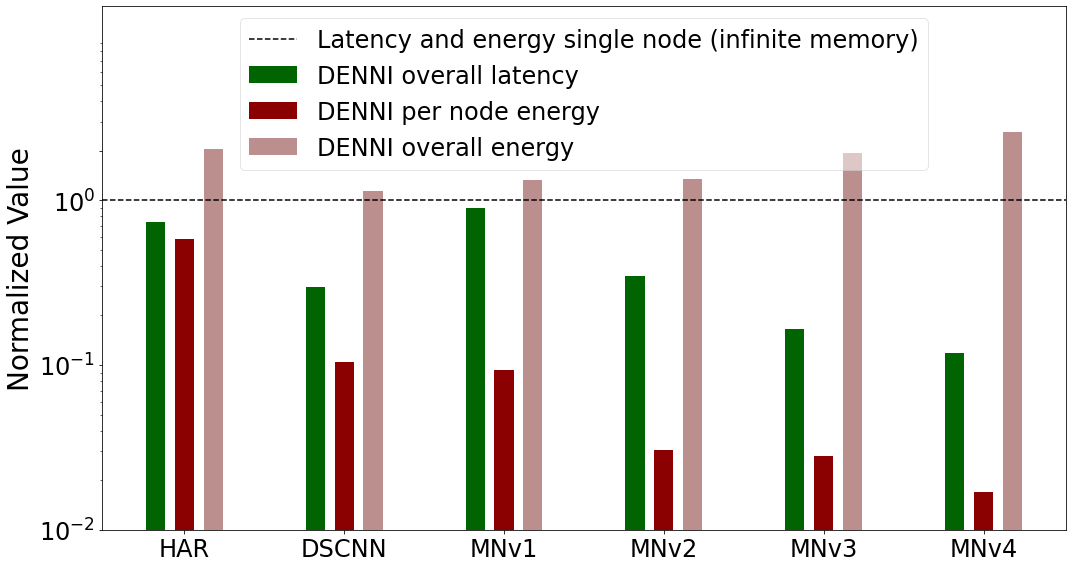

In [47]:
# Normalized and overall energy splitted
w=0.07

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

import matplotlib


#single_node_energyv1

# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42

# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['text.usetex'] = True




plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

Benchmark=["HAR","DSCNN","MNv1","MNv2","MNv3","MNv4"]


# # calculate the overall latency speed up
# overall_latency_up_v4= (single_node_latencyv4/(Overall_Comm_latency_v4+ Overall_Comp_latency_v4))

# # Calculate the per node median i.e. avg node energy saving factor compared to a node with baseline memory
# overall_per_node_energy_save_v4= (single_node_energyv4/np.average(Overall_energy_v4_per_node))

# # calculate the overall energy increase factor of DENNI compared to inference energy on a single node with infinite memory
# overall_energy_inc_v4=(overall_energyv4/single_node_energyv4)



Overall_latency_speedup=[
 
 1.3639615327979364,
 3.363410538039609,   
 1.119504535120221,
 2.8979147313110656,
 6.048636145956951,
 8.452332310660223]


Overall_latency_speedup_recip=[]

for i in range(len(Overall_latency_speedup)):
    Overall_latency_speedup_recip.append((1/Overall_latency_speedup[i]))



Per_node_energy_save=[
 
 1.7273824368132427,
 9.575143096319652,
 10.658928533240681,
 32.62494253057891,
 35.83792683756646,
 59.21034897271402]


Per_node_energy_save_recip=[]

for i in range(len(Per_node_energy_save)):
    Per_node_energy_save_recip.append((1/Per_node_energy_save[i]))


Overall_energy_increase=[

 2.0525984115205818,
 1.1402370183124693,   
 1.3337560786678573,
 1.3515284896543402,
 1.9460805380217934,
 2.5825101944237905]




# Overall_latency_speedup=[overall_latency_up_HAR,overall_latency_up_DS, overall_latency_up_v1, overall_latency_up_v2, overall_latency_up_v3, overall_latency_up_v4]

# Per_node_energy_save=[overall_per_node_energy_save_HAR,overall_per_node_energy_save_DS, overall_per_node_energy_save_v1, overall_per_node_energy_save_v2, overall_per_node_energy_save_v3, overall_per_node_energy_save_v4]

# Overall_energy_increase=[overall_energy_inc_HAR, overall_energy_inc_DS,overall_energy_inc_v1, overall_energy_inc_v2, overall_energy_inc_v3, overall_energy_inc_v4]



width = 0.5 

x = np.arange(len(Benchmark))  # the label locations
width = 0.12  # the width of the bars
a=width
fig, ax = plt.subplots()

#ax2 = ax.twinx()
fig.set_figheight(8)
fig.set_figwidth(15)

ax.set_yscale('log')
#ax2.set_yscale('log')


#ax2 = ax.twinx()


#b=x+2*width
rects1 = ax.bar(x ,Overall_latency_speedup_recip, width=a, label='DENNI overall latency',color='darkgreen')
rects2 = ax.bar(x+1.5*a,Per_node_energy_save_recip, width=a, label='DENNI per node energy',color='darkred')
rects3 = ax.bar(x+3.0*a,Overall_energy_increase, width=a, label='DENNI overall energy', color='rosybrown')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = np.round(rect.get_height(),2)
        if(height!=0):
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',size=16,fontweight='bold')
        else:
             ax.annotate("X",
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',color='darkred',size=16)
                
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = np.round(rect.get_height(),2)
        if(height!=0):
            ax2.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',size=16,fontweight='bold')
        else:
             ax2.annotate("X",
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',color='darkred',size=16)
                
                
# autolabel(rects1)
# autolabel2(rects2)
# autolabel2(rects3)


ax.set_ylabel('Normalized Value',fontsize=28)
#ax2.set_ylabel('Energy',fontsize=24)
ax.set_xticks(x+a+0.001+width/2)
ax.set_xticklabels(Benchmark,fontsize=24)
ax.set_yticks([1/100,1/10,1,2.0])
# ax.set_yticklabels(fontsize=20)
# ax2.set_yticklabels(fontsize=20)
# plt.yticks(fontsize=16)
ax.tick_params(axis='y', labelsize=24)
#ax2.tick_params(axis='y', labelcolor="red", labelsize=24)

#ax.ylim(max(Overall_energy_increase))

ax.set_ylim(0,15)
# ax.legend(fontsize=30)
# ax2.legend(fontsize=30)
                
#plt.title("Energy & Latency plots",size=24)    

ax.axhline(y=1,label="Latency and energy single node (infinite memory)",color="black",linestyle="dashed")
#ax.axhline(y=2)
#ax2.axhline(y=1,label="Energy single node (infinite memory)",color="red",linestyle="dashed")


ax.legend(loc="upper center",fontsize=24,framealpha=0.5,ncol=1)
#ax2.legend(loc=0,fontsize=24)



fig.tight_layout()
fig.savefig("energy_latency_plot_all_normalized_log_recompute_removed.pdf", bbox_inches='tight', dpi=600)
fig.savefig("energy_latency_plot_all_normalized_log_recompute_removed.png", bbox_inches='tight', dpi=600)
# plt.title("Energy and latency results")
#plt.ylim(0,240000)
plt.show()  


In [2]:
Per_node_energy_save

[1.7273824368132427,
 9.575143096319652,
 11.670213319414616,
 37.19265583331479,
 44.81349840389587,
 92.95534479991056]

In [3]:
Per_node_energy_save_recip

[0.578910598306677,
 0.10443708150788523,
 0.08568823659259045,
 0.02688702857041643,
 0.022314705069155342,
 0.010757853700102269]

In [4]:
Overall_energy_increase

[2.0525984115205818,
 1.1402370183124693,
 1.21817916555523,
 1.185544251021644,
 1.556305453170642,
 1.644997715479092]

In [5]:
math.log(1)

0.0

In [18]:
Overall_energy_increase

[2.0525984115205818,
 1.1402370183124693,
 1.3337560786678573,
 1.3515284896543402,
 1.9460805380217934,
 2.5825101944237905]

C:\Users\mailr\Anaconda3\lib\site-packages\ipykernel_launcher.py:170: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


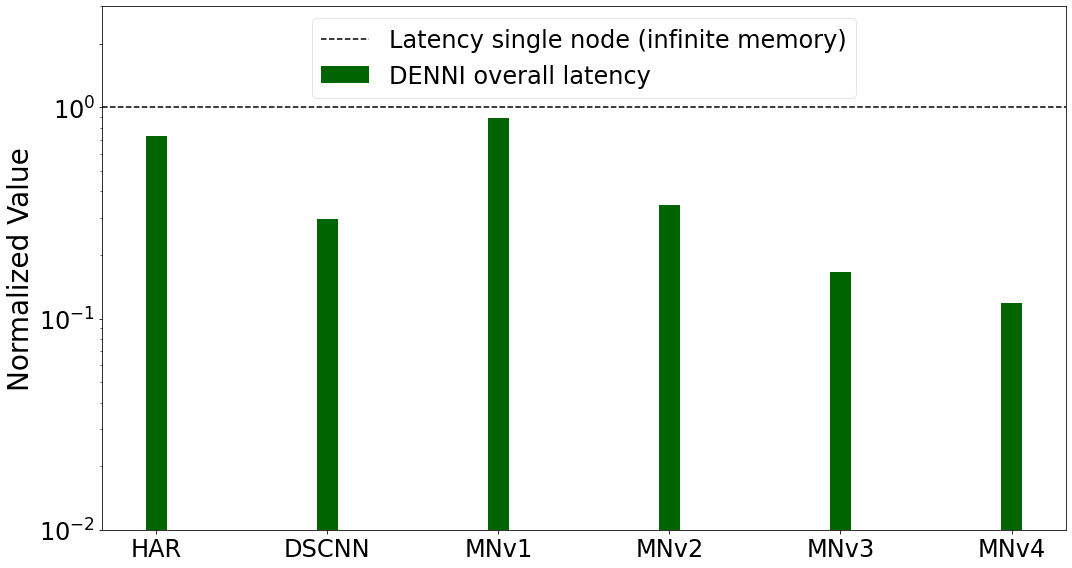

In [15]:
# Normalized and overall Latency splitted
w=0.07

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

import matplotlib


#single_node_energyv1

# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42

# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['text.usetex'] = True




plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

Benchmark=["HAR","DSCNN","MNv1","MNv2","MNv3","MNv4"]


# # calculate the overall latency speed up
# overall_latency_up_v4= (single_node_latencyv4/(Overall_Comm_latency_v4+ Overall_Comp_latency_v4))

# # Calculate the per node median i.e. avg node energy saving factor compared to a node with baseline memory
# overall_per_node_energy_save_v4= (single_node_energyv4/np.average(Overall_energy_v4_per_node))

# # calculate the overall energy increase factor of DENNI compared to inference energy on a single node with infinite memory
# overall_energy_inc_v4=(overall_energyv4/single_node_energyv4)



Overall_latency_speedup=[
 
 1.3639615327979364,
 3.363410538039609,   
 1.119504535120221,
 2.8979147313110656,
 6.048636145956951,
 8.452332310660223]


Overall_latency_speedup_recip=[]

for i in range(len(Overall_latency_speedup)):
    Overall_latency_speedup_recip.append((1/Overall_latency_speedup[i]))



Per_node_energy_save=[
 
 1.7273824368132427,
 9.575143096319652,
 10.658928533240681,
 32.62494253057891,
 35.83792683756646,
 59.21034897271402]


Per_node_energy_save_recip=[]

for i in range(len(Per_node_energy_save)):
    Per_node_energy_save_recip.append((1/Per_node_energy_save[i]))


Overall_energy_increase=[

 2.0525984115205818,
 1.1402370183124693,   
 1.3337560786678573,
 1.3515284896543402,
 1.9460805380217934,
 2.5825101944237905]




# Overall_latency_speedup=[overall_latency_up_HAR,overall_latency_up_DS, overall_latency_up_v1, overall_latency_up_v2, overall_latency_up_v3, overall_latency_up_v4]

# Per_node_energy_save=[overall_per_node_energy_save_HAR,overall_per_node_energy_save_DS, overall_per_node_energy_save_v1, overall_per_node_energy_save_v2, overall_per_node_energy_save_v3, overall_per_node_energy_save_v4]

# Overall_energy_increase=[overall_energy_inc_HAR, overall_energy_inc_DS,overall_energy_inc_v1, overall_energy_inc_v2, overall_energy_inc_v3, overall_energy_inc_v4]



width = 0.5 

x = np.arange(len(Benchmark))  # the label locations
width = 0.12  # the width of the bars
a=width
fig, ax = plt.subplots()

#ax2 = ax.twinx()
fig.set_figheight(8)
fig.set_figwidth(15)

ax.set_yscale('log')
#ax2.set_yscale('log')


#ax2 = ax.twinx()


#b=x+2*width
rects1 = ax.bar(x ,Overall_latency_speedup_recip, width=a, label='DENNI overall latency',color='darkgreen')
# rects2 = ax.bar(x+1.5*a,Per_node_energy_save_recip, width=a, label='DENNI per node energy',color='darkred')
# rects3 = ax.bar(x+3.0*a,Overall_energy_increase, width=a, label='DENNI overall energy', color='rosybrown')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = np.round(rect.get_height(),2)
        if(height!=0):
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',size=16,fontweight='bold')
        else:
             ax.annotate("X",
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',color='darkred',size=16)
                
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = np.round(rect.get_height(),2)
        if(height!=0):
            ax2.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',size=16,fontweight='bold')
        else:
             ax2.annotate("X",
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',color='darkred',size=16)
                
                
# autolabel(rects1)
# autolabel2(rects2)
# autolabel2(rects3)


ax.set_ylabel('Normalized Value',fontsize=28)
#ax2.set_ylabel('Energy',fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(Benchmark,fontsize=24)
ax.set_yticks([1/100,1/10,1,2.0])
# ax.set_yticklabels(fontsize=20)
# ax2.set_yticklabels(fontsize=20)
# plt.yticks(fontsize=16)
ax.tick_params(axis='y', labelsize=24)
#ax2.tick_params(axis='y', labelcolor="red", labelsize=24)

#ax.ylim(max(Overall_energy_increase))

ax.set_ylim(0,3)
# ax.legend(fontsize=30)
# ax2.legend(fontsize=30)
                
#plt.title("Energy & Latency plots",size=24)    

ax.axhline(y=1,label="Latency single node (infinite memory)",color="black",linestyle="dashed")
#ax.axhline(y=2)
#ax2.axhline(y=1,label="Energy single node (infinite memory)",color="red",linestyle="dashed")


ax.legend(loc="upper center",fontsize=24,framealpha=0.5,ncol=1)
#ax2.legend(loc=0,fontsize=24)



fig.tight_layout()
fig.savefig("latency_plot_all_normalized_log_recompute_removed.pdf", bbox_inches='tight', dpi=600)
fig.savefig("latency_plot_all_normalized_log_recompute_removed.png", bbox_inches='tight', dpi=600)
# plt.title("Energy and latency results")
#plt.ylim(0,240000)
plt.show()  


C:\Users\mailr\Anaconda3\lib\site-packages\ipykernel_launcher.py:170: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


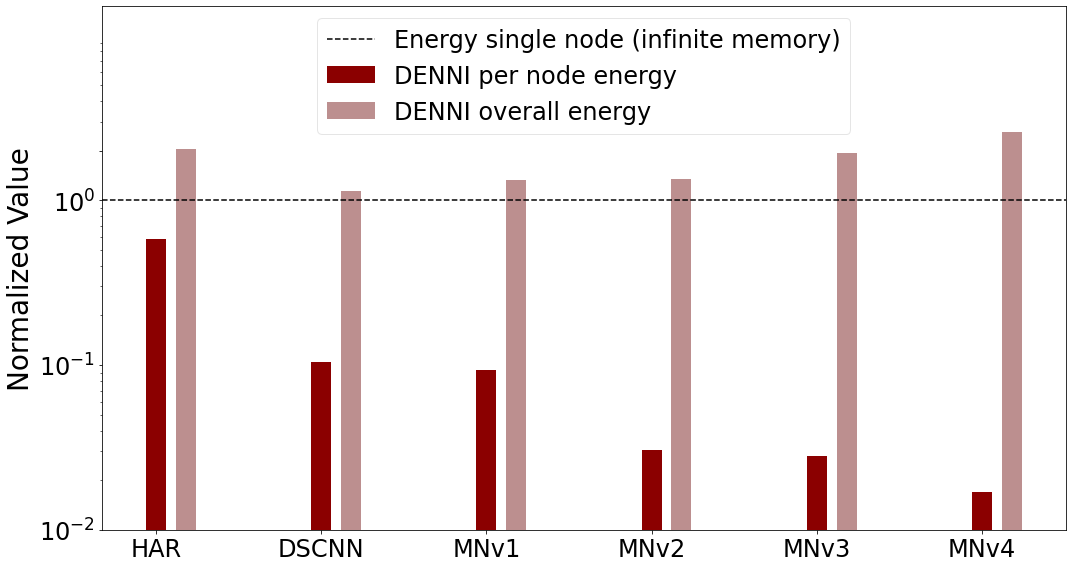

In [13]:
# Normalized and overall Energy splitted
w=0.07

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

import matplotlib


#single_node_energyv1

# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42

# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['text.usetex'] = True




plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

Benchmark=["HAR","DSCNN","MNv1","MNv2","MNv3","MNv4"]


# # calculate the overall latency speed up
# overall_latency_up_v4= (single_node_latencyv4/(Overall_Comm_latency_v4+ Overall_Comp_latency_v4))

# # Calculate the per node median i.e. avg node energy saving factor compared to a node with baseline memory
# overall_per_node_energy_save_v4= (single_node_energyv4/np.average(Overall_energy_v4_per_node))

# # calculate the overall energy increase factor of DENNI compared to inference energy on a single node with infinite memory
# overall_energy_inc_v4=(overall_energyv4/single_node_energyv4)



Overall_latency_speedup=[
 
 1.3639615327979364,
 3.363410538039609,   
 1.119504535120221,
 2.8979147313110656,
 6.048636145956951,
 8.452332310660223]


Overall_latency_speedup_recip=[]

for i in range(len(Overall_latency_speedup)):
    Overall_latency_speedup_recip.append((1/Overall_latency_speedup[i]))



Per_node_energy_save=[
 
 1.7273824368132427,
 9.575143096319652,
 10.658928533240681,
 32.62494253057891,
 35.83792683756646,
 59.21034897271402]


Per_node_energy_save_recip=[]

for i in range(len(Per_node_energy_save)):
    Per_node_energy_save_recip.append((1/Per_node_energy_save[i]))


Overall_energy_increase=[

 2.0525984115205818,
 1.1402370183124693,   
 1.3337560786678573,
 1.3515284896543402,
 1.9460805380217934,
 2.5825101944237905]




# Overall_latency_speedup=[overall_latency_up_HAR,overall_latency_up_DS, overall_latency_up_v1, overall_latency_up_v2, overall_latency_up_v3, overall_latency_up_v4]

# Per_node_energy_save=[overall_per_node_energy_save_HAR,overall_per_node_energy_save_DS, overall_per_node_energy_save_v1, overall_per_node_energy_save_v2, overall_per_node_energy_save_v3, overall_per_node_energy_save_v4]

# Overall_energy_increase=[overall_energy_inc_HAR, overall_energy_inc_DS,overall_energy_inc_v1, overall_energy_inc_v2, overall_energy_inc_v3, overall_energy_inc_v4]



width = 0.5 

x = np.arange(len(Benchmark))  # the label locations
width = 0.12  # the width of the bars
a=width
fig, ax = plt.subplots()

#ax2 = ax.twinx()
fig.set_figheight(8)
fig.set_figwidth(15)

ax.set_yscale('log')
#ax2.set_yscale('log')


#ax2 = ax.twinx()


#b=x+2*width
#rects1 = ax.bar(x ,Overall_latency_speedup_recip, width=a, label='DENNI overall latency',color='darkgreen')
rects2 = ax.bar(x,Per_node_energy_save_recip, width=a, label='DENNI per node energy',color='darkred')
rects3 = ax.bar(x+1.5*a,Overall_energy_increase, width=a, label='DENNI overall energy', color='rosybrown')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = np.round(rect.get_height(),2)
        if(height!=0):
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',size=16,fontweight='bold')
        else:
             ax.annotate("X",
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',color='darkred',size=16)
                
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = np.round(rect.get_height(),2)
        if(height!=0):
            ax2.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',size=16,fontweight='bold')
        else:
             ax2.annotate("X",
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',color='darkred',size=16)
                
                
# autolabel(rects1)
# autolabel2(rects2)
# autolabel2(rects3)


ax.set_ylabel('Normalized Value',fontsize=28)
#ax2.set_ylabel('Energy',fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(Benchmark,fontsize=24)
ax.set_yticks([1/100,1/10,1,2.0])
# ax.set_yticklabels(fontsize=20)
# ax2.set_yticklabels(fontsize=20)
# plt.yticks(fontsize=16)
ax.tick_params(axis='y', labelsize=24)
#ax2.tick_params(axis='y', labelcolor="red", labelsize=24)

#ax.ylim(max(Overall_energy_increase))

ax.set_ylim(0,15)
# ax.legend(fontsize=30)
# ax2.legend(fontsize=30)
                
#plt.title("Energy & Latency plots",size=24)    

ax.axhline(y=1,label="Energy single node (infinite memory)",color="black",linestyle="dashed")
#ax.axhline(y=2)
#ax2.axhline(y=1,label="Energy single node (infinite memory)",color="red",linestyle="dashed")


ax.legend(loc="upper center",fontsize=24,framealpha=0.5,ncol=1)
#ax2.legend(loc=0,fontsize=24)



fig.tight_layout()
fig.savefig("Energy_plot_all_normalized_log_recompute_removed.pdf", bbox_inches='tight', dpi=600)
fig.savefig("Energy_plot_all_normalized_log_recompute_removed.png", bbox_inches='tight', dpi=600)
# plt.title("Energy and latency results")
#plt.ylim(0,240000)
plt.show()  
